## <p style = 'text-align: center'>CUSTOMER SEGMENTATION USING KMEANS CLUSTERING</p>
---




<p align="center">
<img src="k-means-clustering-algorithm-in-machine-learning.png" width="800" height="300" />
</p>

## Importing the necessary Libraries


In [285]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import pickle

np.random.seed(42)

sns.set(style = 'darkgrid')

Yellowbrick is a Python library designed for visualizing machine learning models and aiding in the model selection process.
It is built on top of scikit-learn.

It provides a set of visualizers to help users better understand the behavior of machine learning models, diagnose potential issues, and make more informed decisions during the model selection and evaluation process.

In [286]:
#%pip install yellowbrick

## Loading the data set

In [287]:
df = pd.read_csv(r'C:\Users\Bildad Otieno\Documents\Billy_Repo\Customer_Segmentation\marketing_campaign.xls', sep = '\t')
df.index = df.index +1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [288]:
# The dimensions of the dataset, we have 2240 records and 5 Columns
df.shape

(2240, 29)

In [289]:
#Features within the Dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [290]:
#The total number of null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [291]:
#Removing the records with null values
df.dropna(inplace=True)

In [292]:
#Removing Duplicates
df.drop_duplicates(inplace=True)

In [293]:
#Description of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 1 to 2240
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [294]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [295]:
#Summary of the Stats
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Feature Engineering


Feature engineering is the process of transforming raw data into a format that is more suitable for machine learning algorithms, making it easier for models to understand patterns and make accurate predictions. 

It involves creating new features, modifying existing ones, or selecting the most relevant features to enhance the performance of a machine learning model

In [296]:
#Dt_Customer indicates date Customer joined database
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_9316\2781831106.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [297]:
#Determining the registeration dates
print('Last customer registered date:',max(df['Dt_Customer']))
print('Earliest customer registered date:',min(df['Dt_Customer']))

Last customer registered date: 2014-12-06 00:00:00
Earliest customer registered date: 2012-01-08 00:00:00


In [298]:
#Finding the relative time one has been a customer

End_date = max(df['Dt_Customer'])
Duration = []
for d in df['Dt_Customer']:
    diff = End_date - d
    diff = pd.Timedelta(diff)
    Duration.append(diff.days)

In [299]:
#Assigning the dates as a column within the dataframe
df['Customer_For (Days)'] = Duration

In [300]:
#Creating a new feature showing the Customer Age
df['Cust_Age'] = 2021 - df['Year_Birth']

In [301]:
#Calculating total expenditure per customer
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [302]:
#Reducing Categorical Values in Marital_Status to Partner and Alone
df['Lives_With'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [303]:
#Merging values in columns Kidhome and Teenhome
df["No_of_Children"] = df['Kidhome'] + df['Teenhome'] 

In [304]:
#Creating a new Column "Family_Size" indicating size of Customer Household
df["Family_Size"] = df['Lives_With'].replace({"Alone":1, "Partner":2}) + df['No_of_Children']

In [305]:
#If the condition is true (i.e., if the value in the "Children" column is greater than 0), the corresponding element in the new "Is_Parent" column is set to 1. If the condition is false, the corresponding element is set to 0.
df['Is_Parent'] = np.where(df['No_of_Children'] > 0, 1, 0)

In [306]:
#Reducing Categorical Values of Education into 3: UnderGrad, Grad, PostGrad
df["Education"] = df['Education'].replace({"Basic":"UnderGrad", "2n Cycle":"UnderGrad", "Graduation":"Grad", "Master":"PostGrad", "PhD":"PostGrad"})

In [307]:
#Renaming Columns
df = df.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [308]:
#Retaining the new features generated and removing the old ones
df = df.drop(columns={'Dt_Customer', 'Marital_Status', 'Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue'}, axis = 1)

In [309]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For (Days),Cust_Age,Spent,No_of_Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,512.006318,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,340.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,513.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,686.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1063.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


## Pairplot
The primary purpose of a pair plot is to provide a quick visual overview of the relationships between multiple variables in a dataset.

Pair plots are particularly useful when dealing with multivariate datasets, where you have more than two variables. They allow you to visualize interactions between multiple pairs of variables simultaneously.

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_9316\3558545500.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.pairplot(df[{"Income", "Recency", "Customer_For (Days)", "Cust_Age", "Spent", "Is_Parent"}], hue = "Is_Parent")


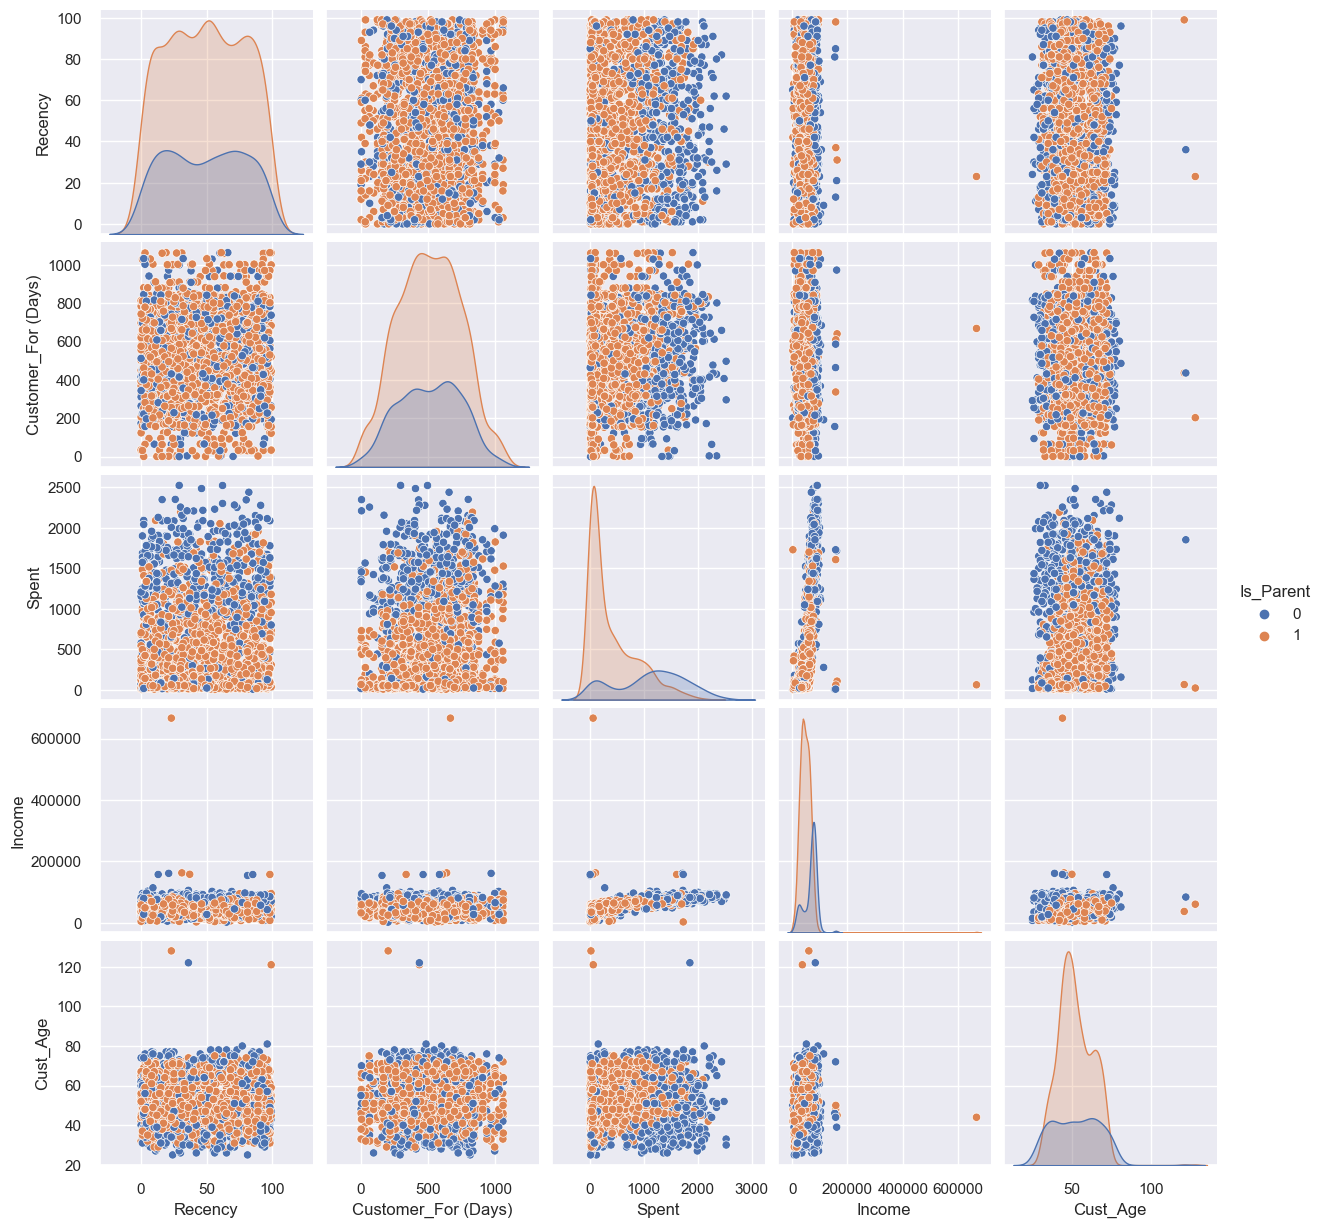

In [310]:
sns.pairplot(df[{"Income", "Recency", "Customer_For (Days)", "Cust_Age", "Spent", "Is_Parent"}], hue = "Is_Parent")

In [311]:
#Filtering outliers
df = df[df["Cust_Age"]<90]
df = df[df['Income'] < 600000]

## Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between many variables. 

Each cell in the table represents the correlation between two variables, and the matrix is often used to understand the relationships between different variables in a dataset.

C:\Users\Bildad Otieno\AppData\Local\Temp\ipykernel_9316\3491389106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

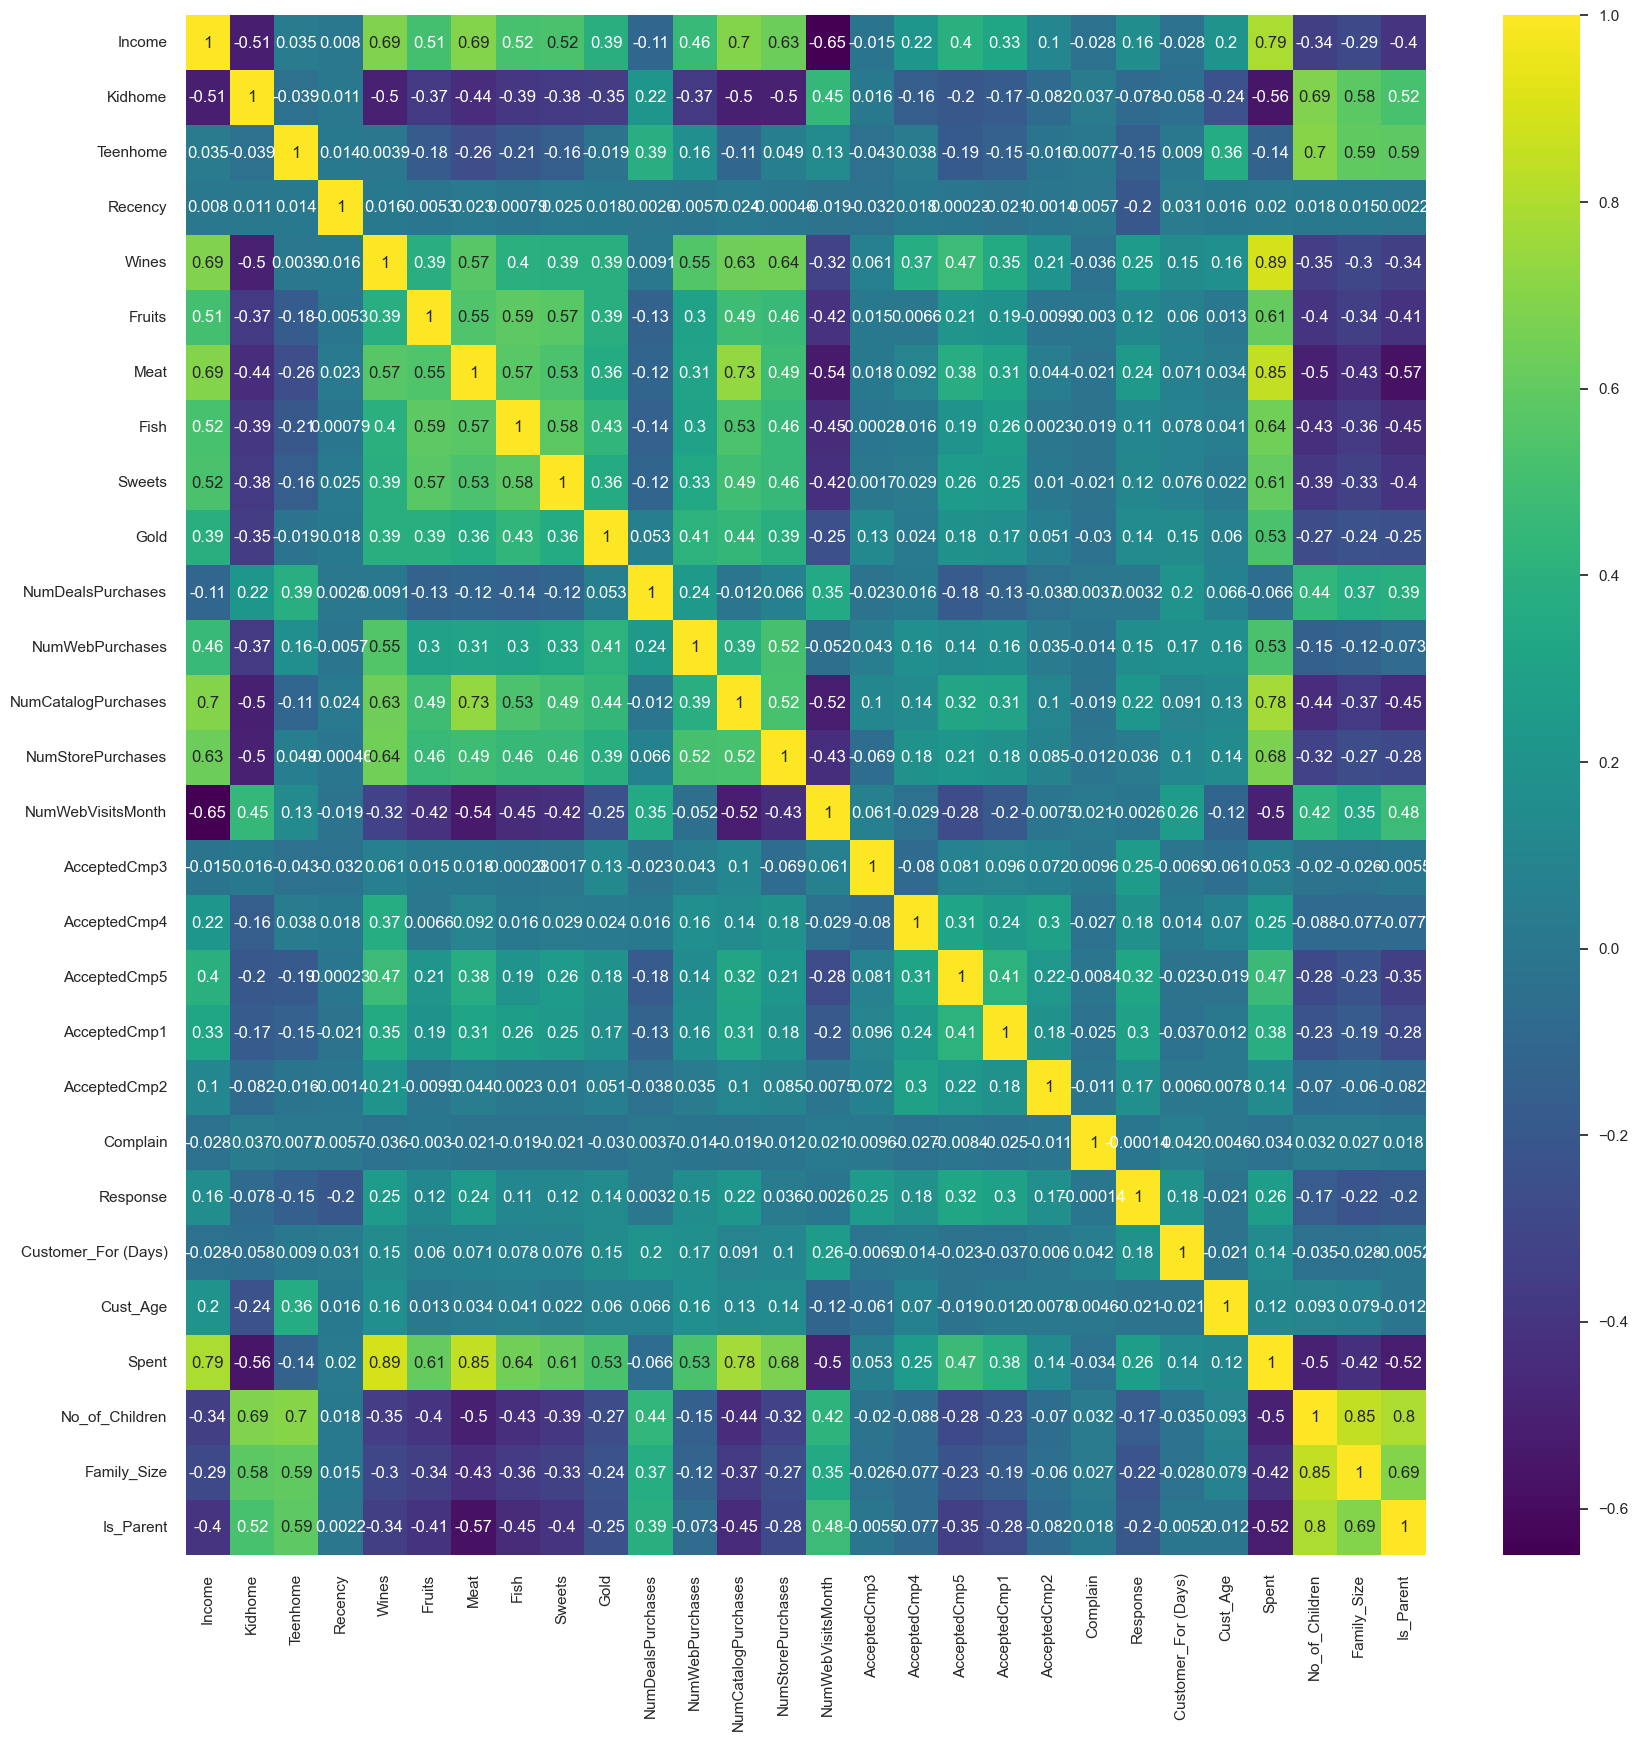

In [312]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,20))

#Integrating Heatmap with Correlation Matrix to make it more Clear

sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis')

In [313]:
#Determining non-numerical variables
for column_name, dt in df.dtypes.items():
    if dt == 'object':
        print(f"{column_name}: {dt}")

Education: object
Lives_With: object


In [314]:
#Performing Label Encoding
enc = LabelEncoder()
df['Education'] = df[['Education']].apply(enc.fit_transform)
df['Lives_With'] = df[['Lives_With']].apply(enc.fit_transform)

In [315]:
#Number of distribution of values in the now encoded feature
df['Education'].value_counts()

0    1115
1     845
2     252
Name: Education, dtype: int64

In [316]:
ds = df.copy()

del_col = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

ds = ds.drop(del_col, axis =1)

## Scaling
We perform scaling to ensure that the features have similar scales or magnitudes.

This ensures that the transformed data has a mean of 0 and a standard deviation of 1.

In [317]:
scaler = StandardScaler()

scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For (Days),Cust_Age,Spent,Lives_With,No_of_Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.124112,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,-1.940414,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-0.847936,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,-0.843635,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


## PCA(Principal Component Analysis)

The key idea behind PCA is to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original variability as possible. This can be beneficial for visualizing data, reducing noise, and improving the efficiency of machine learning algorithms, especially when dealing with datasets with many features.

In [318]:
#Using PCA to reduce dimensions(features) to 3 
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = (['Col1', 'Col2', 'Col3']))

In [319]:
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Col1,2212.0,0.000000e+00,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
Col2,2212.0,5.139550e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
Col3,2212.0,6.986575e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


In [320]:
x = PCA_ds['Col1']
y = PCA_ds['Col2']
z = PCA_ds['Col3']

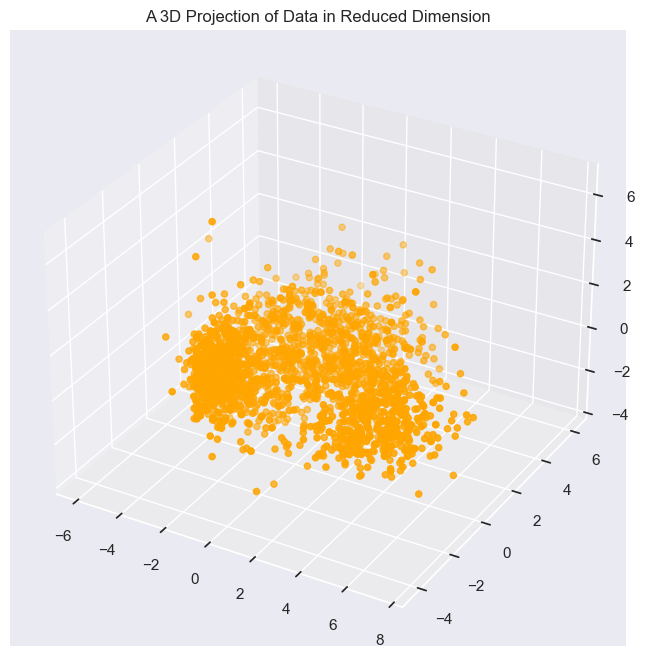

In [321]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_title("A 3D Projection of Data in Reduced Dimension")
ax.scatter(x,y,z, c = 'orange')

## Elbow Method
The *elbow* method is a technique used to determine the optimal number of clusters in a dataset for a k-means clustering algorithm. 

It involves plotting the explained variation as a function of the number of clusters.

The *elbow* of the curve represents a point where adding more clusters does not significantly improve the model's performance.

c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bildad Otieno\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

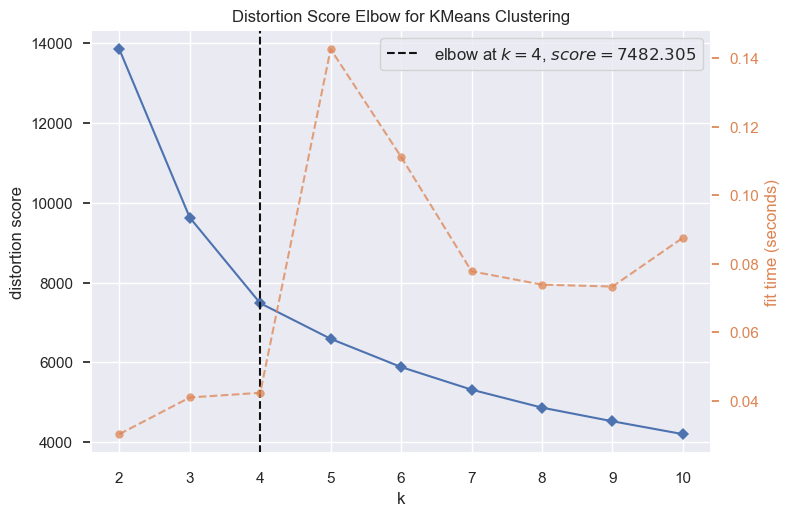

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [322]:
#Elbow Method to Determine the Optimum Number of Clusters
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [323]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [335]:
#Saving the model using pickle
with open('Cluster.pkl', 'wb') as model_file:
    pickle.dump(AC, model_file)

In [325]:
'''#Saving the clustered data using pickle
with open('Clustered_data', 'wb') as data_file:
    pickle.dump(PCA_ds, data_file)'''

"#Saving the clustered data using pickle\nwith open('Clustered_data', 'wb') as data_file:\n    pickle.dump(PCA_ds, data_file)"

In [326]:
df['Clusters'] = yhat_AC

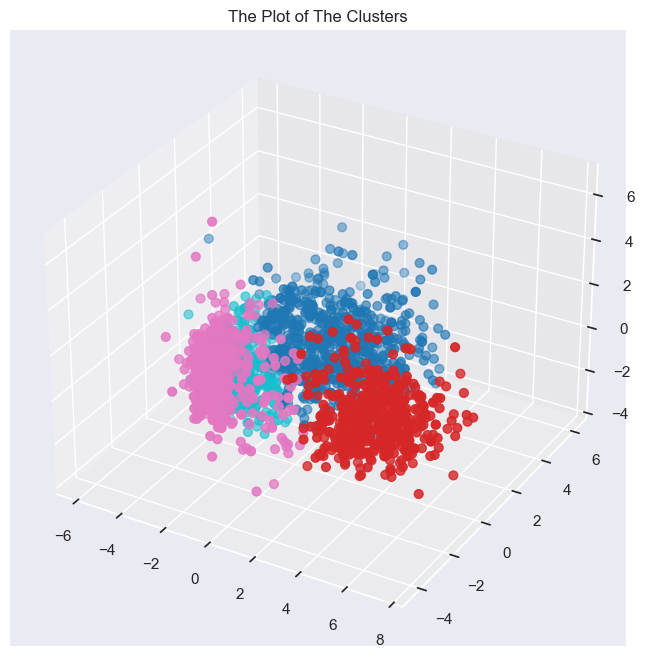

In [327]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x,y,z, s = 40, c = PCA_ds["Clusters"], marker = 'o', cmap = "tab10")
ax.set_title("The Plot of The Clusters")
plt.show()

## Number Distribution among Clusters

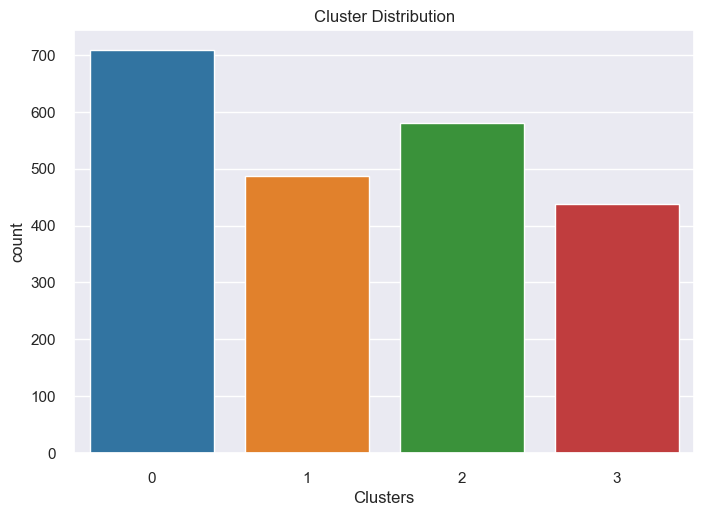

In [328]:
figure = sns.countplot(x= df['Clusters'], palette="tab10")
figure.set_title("Cluster Distribution")
plt.show()

In [329]:
df['Clusters'].value_counts()

0    708
2    580
1    487
3    437
Name: Clusters, dtype: int64

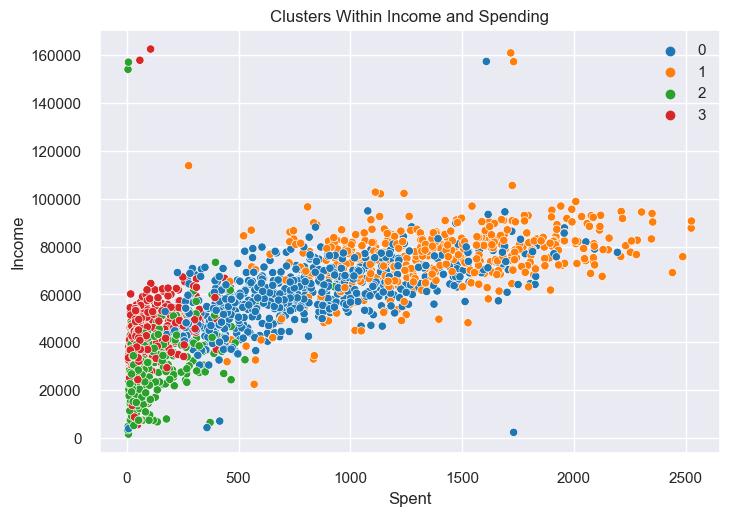

In [330]:
figure = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters'], palette="tab10")
figure.set_title("Clusters Within Income and Spending")
figure.legend()

## Visualizing Cluster Distributions

Text(0.5, 0, 'No. of Total Accepted Promos')

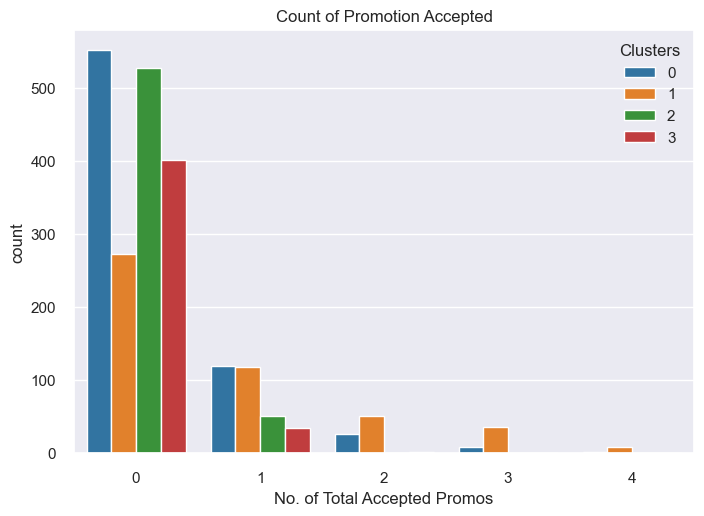

In [331]:
#Totaling Accepted Promotions
df['Total_Promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] +df['AcceptedCmp4'] + df['AcceptedCmp5']

figure = sns.countplot(x = df['Total_Promos'], hue = df['Clusters'], palette='tab10')

figure.set_title("Count of Promotion Accepted")
figure.set_xlabel("No. of Total Accepted Promos")


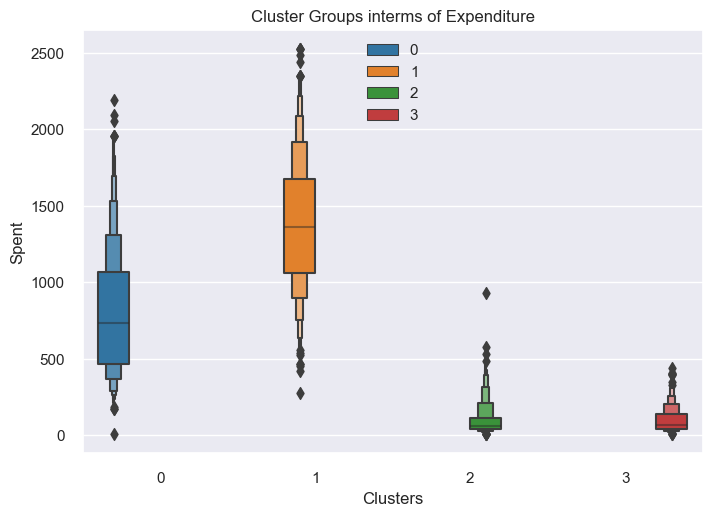

In [332]:
figure = sns.boxenplot(x = df['Clusters'], y = df['Spent'], hue = df['Clusters'], palette='tab10')
figure.set_title("Cluster Groups interms of Expenditure")
figure.legend(loc = 'upper center')

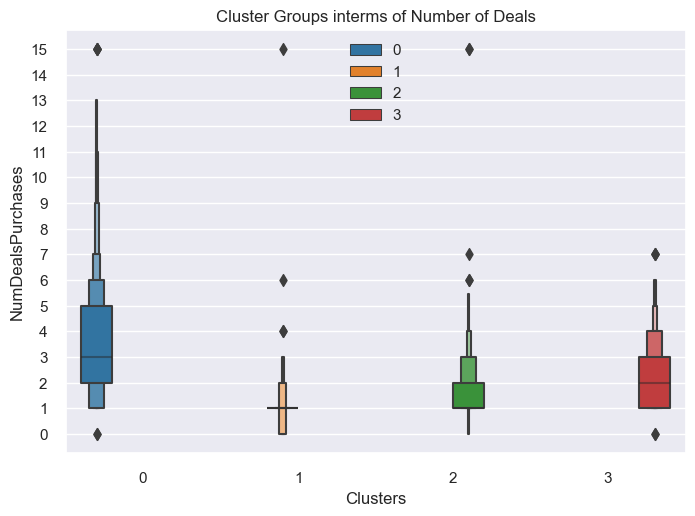

In [333]:
figure = sns.boxenplot(x = df['Clusters'], y = df['NumDealsPurchases'], hue = df['Clusters'], palette='tab10')
figure.set_title("Cluster Groups interms of Number of Deals")
figure.legend(loc = 'upper center')
figure.xaxis.set_major_locator(plt.MaxNLocator(20))
figure.yaxis.set_major_locator(plt.MaxNLocator(20))

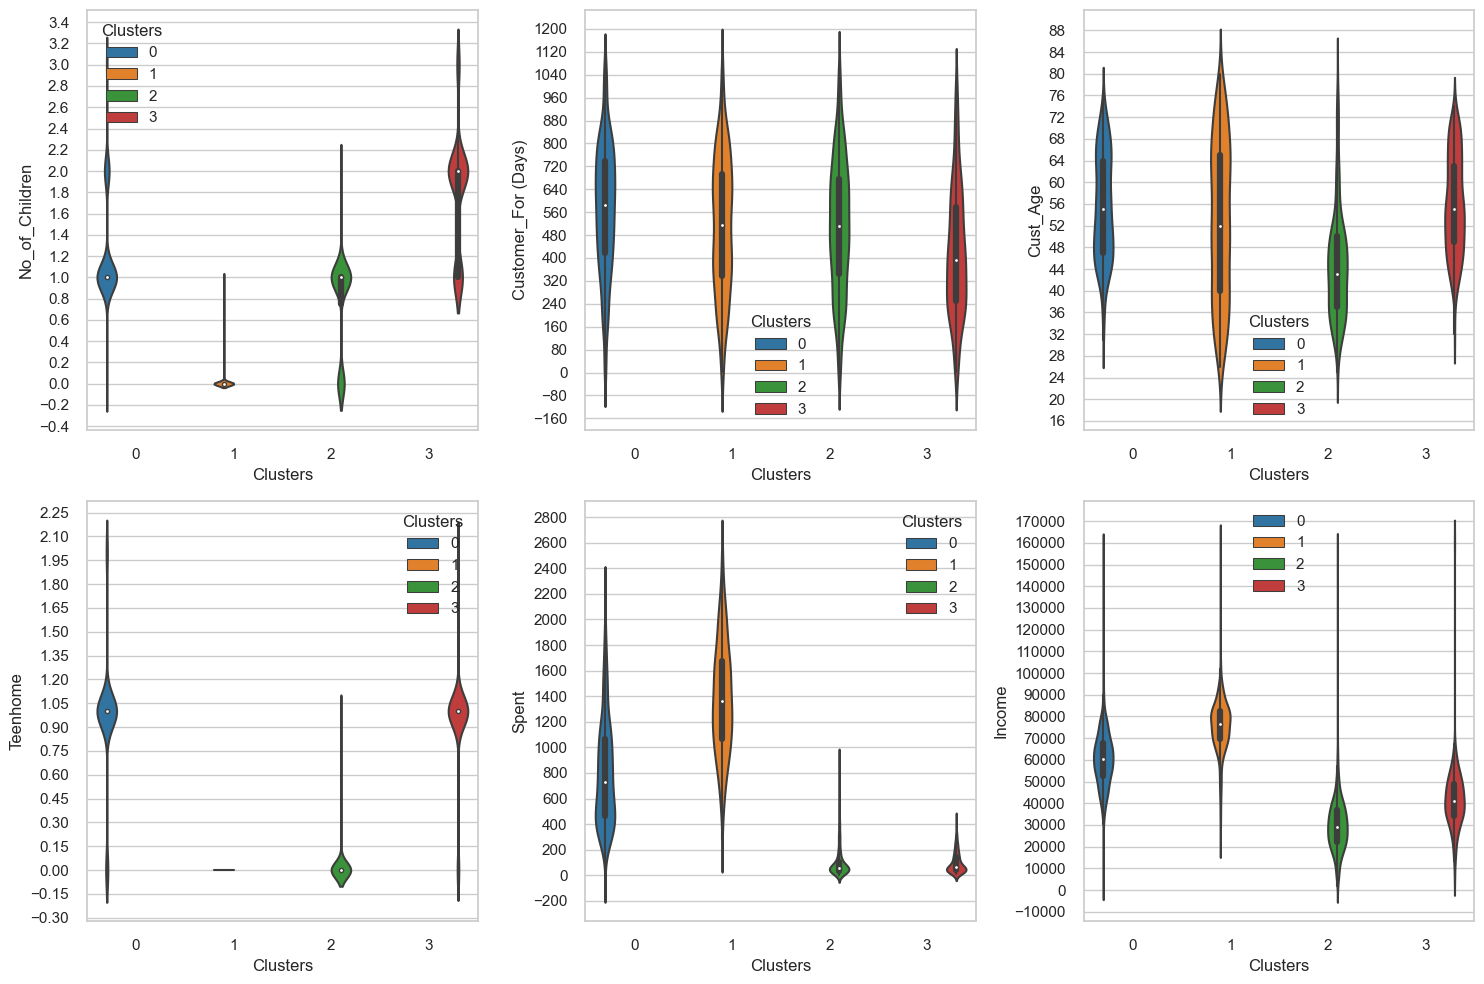

In [334]:
sns.set_style("whitegrid")
Personal = ["No_of_Children", "Customer_For (Days)", "Cust_Age", "Teenhome", "Spent", "Income"]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array to iterate through it
axes = axes.flatten()

# Loop through each feature and create a violin plot
for i, feature in enumerate(Personal):
    figure = sns.violinplot(x=df["Clusters"], y=df[feature], ax=axes[i], hue=df['Clusters'], palette="tab10")

    figure.xaxis.set_major_locator(plt.MaxNLocator(20))
    figure.yaxis.set_major_locator(plt.MaxNLocator(20))
# Adjust layout
plt.tight_layout()
plt.legend(loc = 'upper center')

plt.show()

## <p style = 'text-align: center'>Profiling the Clusters</p>
---
From the clusters formed, we can profile them and draw conclusions with regards to the type of customers present.This will be useful in order to determine the  necessary actions required by the marketing team to retain the loyal, most spending customers, how to encourage the relatively loyal and spending customers whilst determining ways to attract new markets as well.

<p align="center">

<img src = "Cluster.png" width="600" height="400" />
</p>

## Note <span style = "color: red">(Important!)</span>
Customer preferences and behaviors may change over time.

Periodically re-run your clustering and profiling process to adapt to evolving patterns. This can be done by retraining your clustering model on new data.